In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/heart_disease_dataset.csv")

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.shape 

(4240, 16)

In [6]:
# check missing values 
missing_data = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='Missing Count', ascending=False)

print(missing_data)

                 Missing Count  Missing %
glucose                    388   9.150943
education                  105   2.476415
BPMeds                      53   1.250000
totChol                     50   1.179245
cigsPerDay                  29   0.683962
BMI                         19   0.448113
heartRate                    1   0.023585
male                         0   0.000000
prevalentHyp                 0   0.000000
prevalentStroke              0   0.000000
age                          0   0.000000
currentSmoker                0   0.000000
diaBP                        0   0.000000
sysBP                        0   0.000000
diabetes                     0   0.000000
TenYearCHD                   0   0.000000


#### Fill missing values 

In [7]:
# fill missing values 
df["glucose"] = df["glucose"].fillna(df["glucose"].mean()) # use mean values for glucose level

In [8]:
df['education'] = df['education'].fillna(df['education'].mode()[0]) # most value is used 

In [9]:
df['BPMeds'].unique()

array([ 0.,  1., nan])

In [10]:
# For BPMeds - fill based on bewlo defined conditons 
diabetic_condition = (df['diabetes'] == 1) & ((df['sysBP'] > 130) | (df['diaBP'] > 80))
non_diabetic_condition = (df['diabetes'] == 0) & ((df['sysBP'] > 140) | (df['diaBP'] > 90))

# Fill
df.loc[diabetic_condition, 'BPMeds'] = 1
df.loc[non_diabetic_condition, 'BPMeds'] = 1
df.loc[~(diabetic_condition | non_diabetic_condition), 'BPMeds'] = 0

In [11]:
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())

In [12]:
df.loc[(df['currentSmoker'] == 1) & (df['cigsPerDay'].isnull()), 'cigsPerDay'] = df.loc[df['currentSmoker'] == 1, 'cigsPerDay'].mean()
df.loc[(df['currentSmoker'] == 0) & (df['cigsPerDay'].isnull()), 'cigsPerDay'] = 0

In [13]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [14]:
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())

In [15]:
df.isnull().sum().sum()

np.int64(0)

In [16]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

#### Handling Outliers

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
cont_vars = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

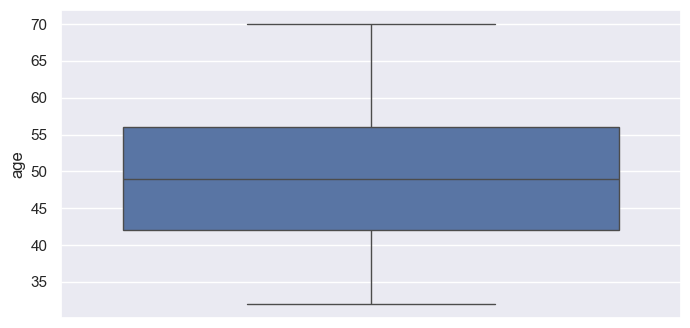

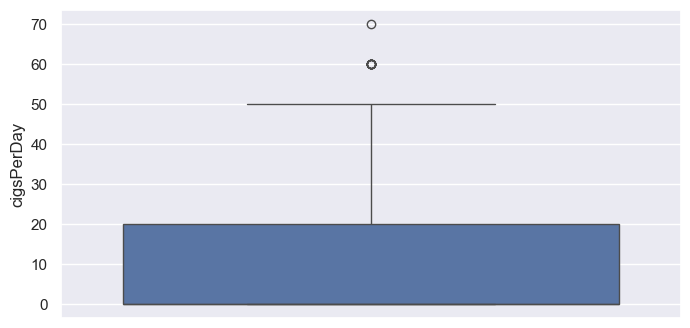

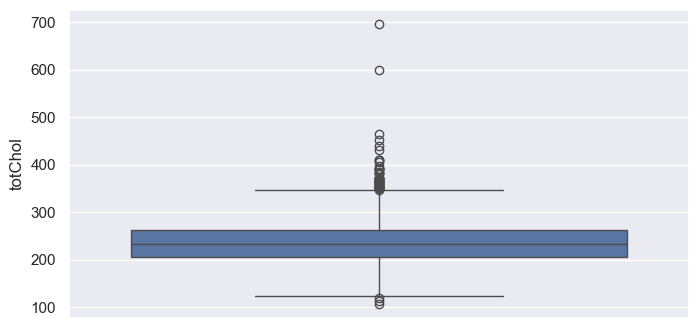

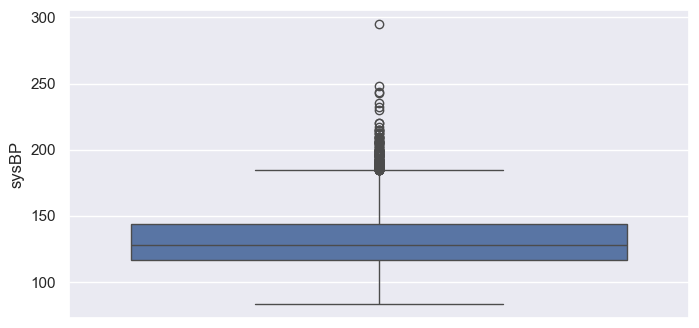

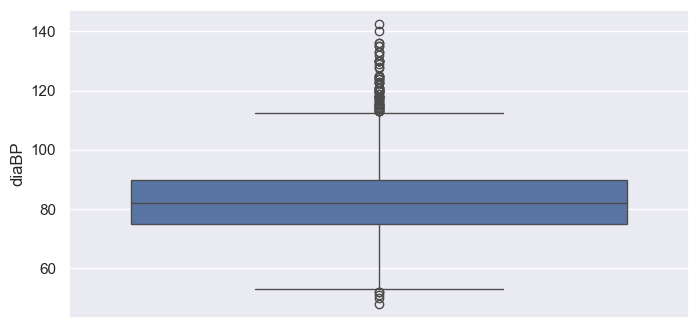

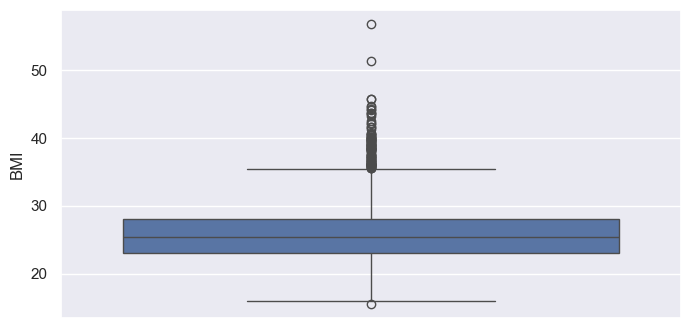

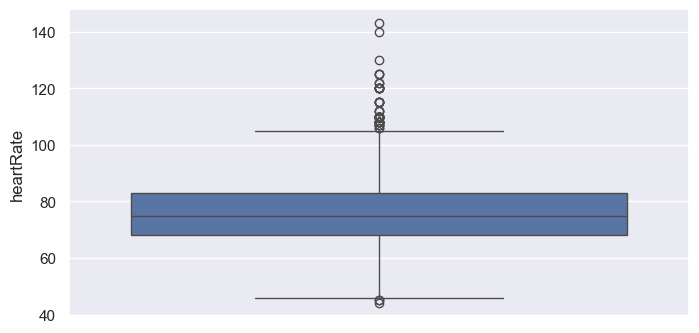

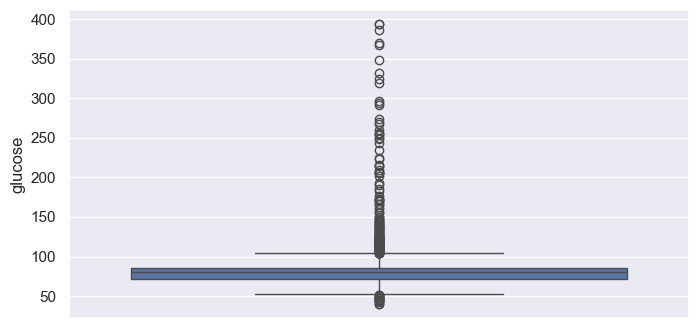

In [21]:
# Visualising the outliers
sns.set()
for var in cont_vars:
  plt.figure(figsize = (8,4))
  sns.boxplot(data = df, y = var)
  plt.ylabel(var)
  plt.show()

In [22]:
# remove outliers 
for col in cont_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

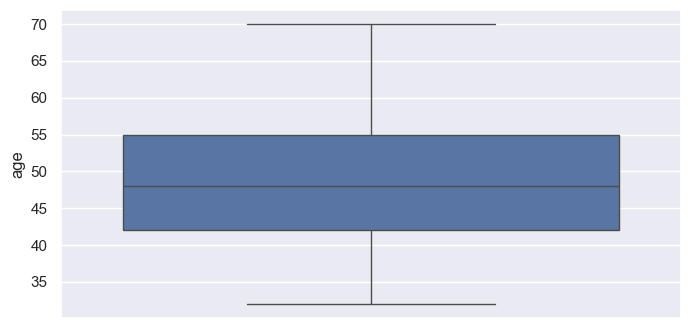

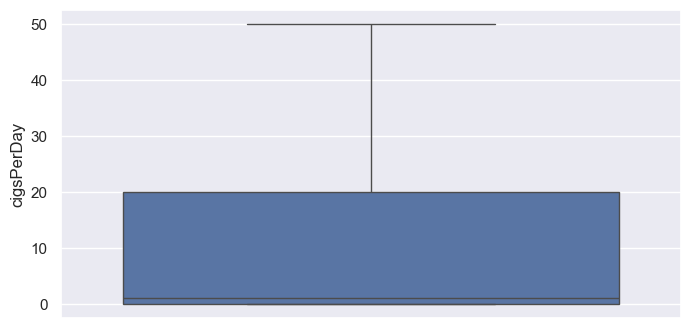

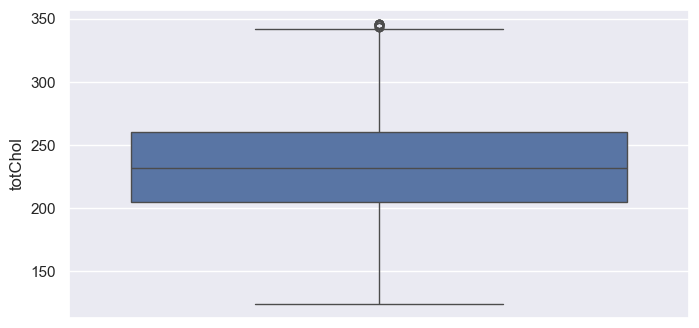

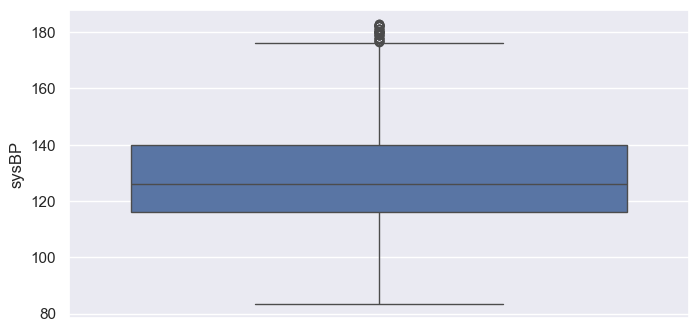

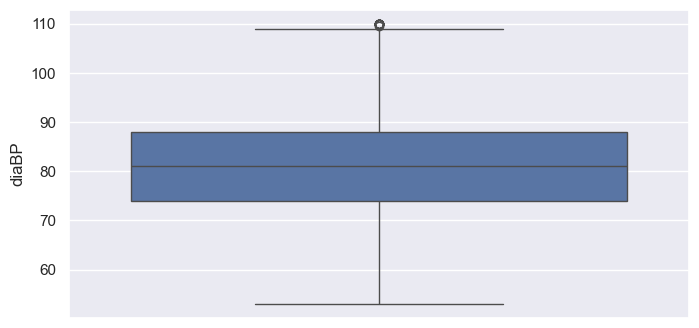

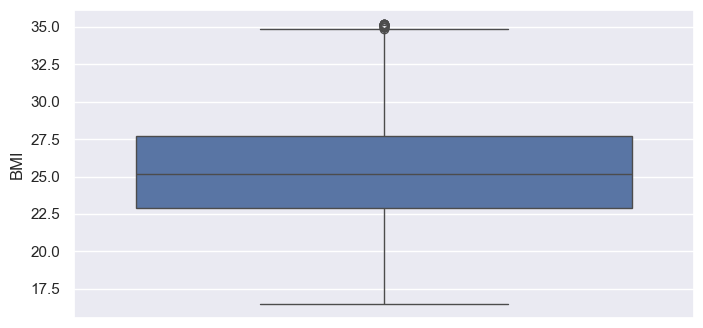

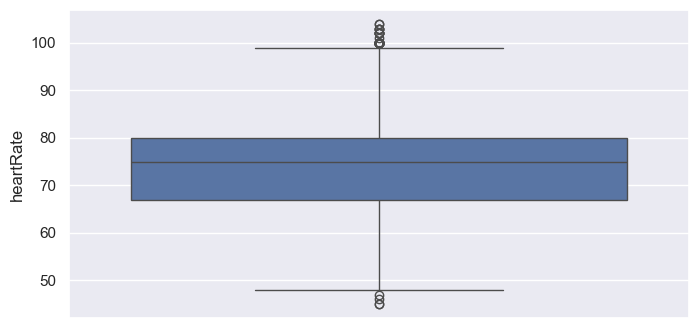

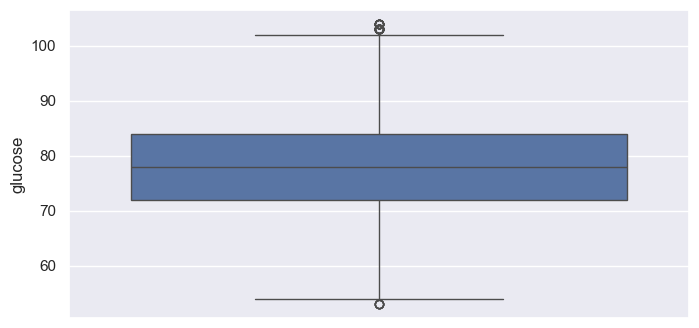

In [23]:
# Visualising the outliers
sns.set()
for var in cont_vars:
  plt.figure(figsize = (8,4))
  sns.boxplot(data = df, y = var)
  plt.ylabel(var)
  plt.show()

In [24]:
df.shape

(3632, 16)

In [26]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,1.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [27]:
# class imbalance
df['TenYearCHD'].value_counts(normalize=True) * 100

TenYearCHD
0    86.729075
1    13.270925
Name: proportion, dtype: float64

In [28]:
df.to_csv("../data/processed/heart_disease_dataset.csv", index=False)

In [29]:
# Load the processed dataset
df = pd.read_csv("../data/processed/heart_disease_dataset.csv")
print("Dataset Shape:", df.shape)

#  any remaining missing values
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df) * 100).round(2)
missing_summary = pd.DataFrame({'Missing Count': missing_counts, 'Missing %': missing_percent})
print("\nMissing Values Summary:\n", missing_summary)

# check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# check basic statistics for numeric columns
print("\nDescriptive Statistics:\n", df.describe())

# check feature types
print("\nData Types:\n", df.dtypes)

# check for target distribution
if 'TenYearCHD' in df.columns:
    print("\nTarget Distribution:\n", df['TenYearCHD'].value_counts(normalize=True)*100)


Dataset Shape: (3632, 16)

Missing Values Summary:
                  Missing Count  Missing %
male                         0        0.0
age                          0        0.0
education                    0        0.0
currentSmoker                0        0.0
cigsPerDay                   0        0.0
BPMeds                       0        0.0
prevalentStroke              0        0.0
prevalentHyp                 0        0.0
diabetes                     0        0.0
totChol                      0        0.0
sysBP                        0        0.0
diaBP                        0        0.0
BMI                          0        0.0
heartRate                    0        0.0
glucose                      0        0.0
TenYearCHD                   0        0.0

Number of duplicate rows: 0

Descriptive Statistics:
               male          age    education  currentSmoker   cigsPerDay  \
count  3632.000000  3632.000000  3632.000000    3632.000000  3632.000000   
mean      0.439152    49.01

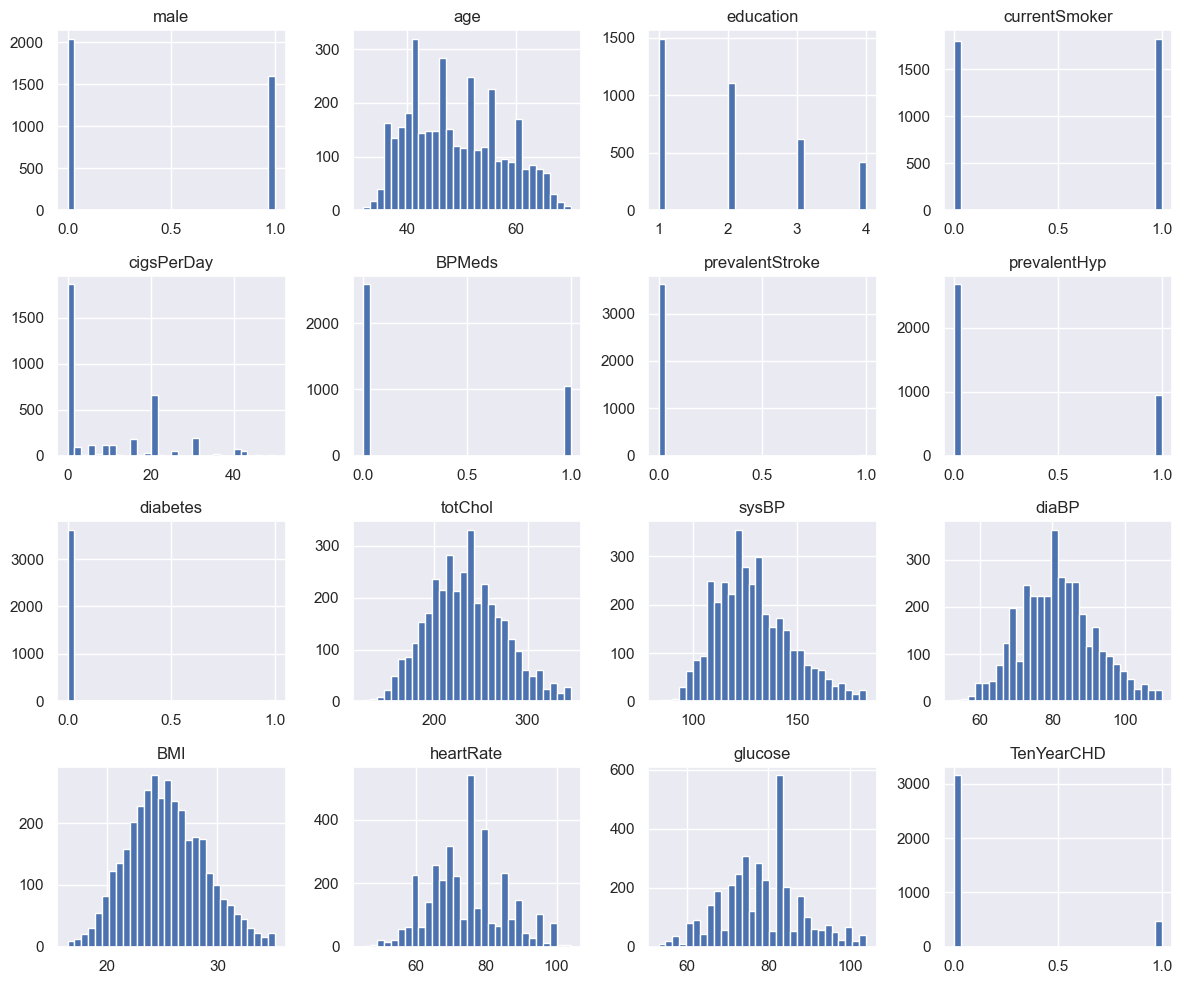

In [30]:
import matplotlib.pyplot as plt
df = pd.read_csv("../data/processed/heart_disease_dataset.csv")
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()
